<a href="https://colab.research.google.com/github/Djhndk/Tugas_Praktikum_PengolahanCitra/blob/main/Tugas_Prak_PengolahanCitra_G_211_22_0074.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **TUGAS PRAKTIKUM 4**
Segmentasi citra menggunakan 4 metode yang berbeda


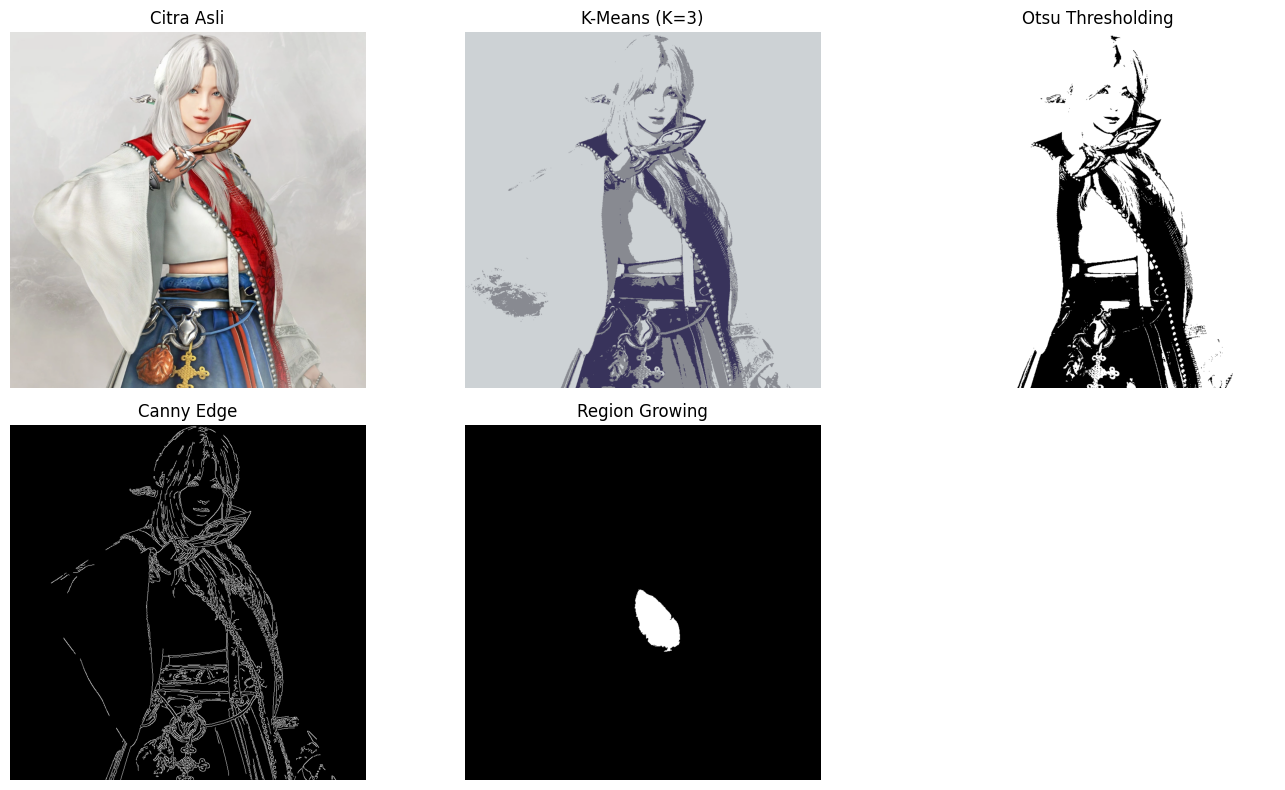

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import flood

# --- Baca dan siapkan gambar ---
img = cv2.imread("/content/drive/MyDrive/Praktikum Pengolahan Citra/Image Data/maegu.webp")
assert img is not None, "Gambar tidak ditemukan."
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --- K-Means Clustering ---
Z = np.float32(img.reshape((-1, 3)))
_, labels, centers = cv2.kmeans(Z, 3, None,
    (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0),
    10, cv2.KMEANS_RANDOM_CENTERS)
seg_kmeans = centers[labels.flatten()].reshape(img.shape).astype(np.uint8)

# --- Otsu Thresholding ---
_, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# --- Edge-Based (Canny) ---
edges = cv2.Canny(gray, 100, 200)

# --- Region Growing ---
seed = (gray.shape[0] // 2, gray.shape[1] // 2)
region = flood(gray, seed, tolerance=20)
region_grow = np.where(region, 255, 0).astype(np.uint8)

# --- Tampilkan Semua Hasil ---
titles = ["Citra Asli", "K-Means (K=3)", "Otsu Thresholding", "Canny Edge", "Region Growing"]
images = [img_rgb, seg_kmeans, otsu, edges, region_grow]
cmaps = [None, None, 'gray', 'gray', 'gray']

plt.figure(figsize=(14, 8))
for i, (title, img, cmap) in enumerate(zip(titles, images, cmaps), 1):
    plt.subplot(2, 3, i)
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
plt.tight_layout()
plt.show()


# **TUGAS PRAKTIKUM 5**

Deteksi Wajah dan Berikan Informasi nama dan usia

**Dengan MTCNN**

In [3]:
!pip install mtcnn opencv-python -q



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 81.2 MB/s eta 0:00:00


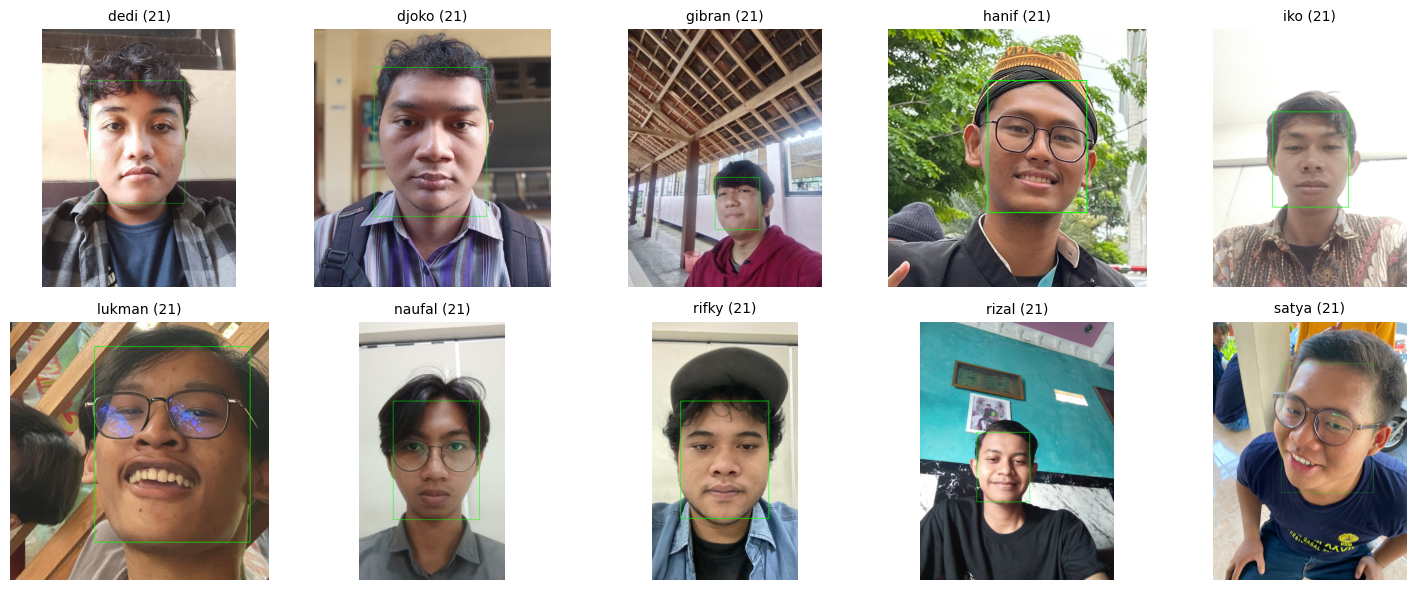

In [4]:
import cv2, os
import matplotlib.pyplot as plt
from mtcnn import MTCNN

path = '/content/drive/MyDrive/Praktikum Pengolahan Citra/Data Wajah Pengolahan Citra/Data Wajah'

detector = MTCNN()
files = sorted([f for f in os.listdir(path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])[:10]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i, f in enumerate(files):
    fp = os.path.join(path, f)
    img = cv2.imread(fp)
    if img is None: continue
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img_rgb)
    for face in faces:
        x, y, w, h = face['box']
        cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (0,255,0), 2)
    axes[i].imshow(img_rgb)
    axes[i].axis('off')
    axes[i].set_title(f"{os.path.splitext(f)[0]} (21)", fontsize=10)

plt.tight_layout()
plt.show()

**Dengan MTCNN + Deepface**

In [5]:
!pip install mtcnn opencv-python deepface -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.1/250.1 kB 12.1 MB/s eta 0:00:00


25-12-16 10:31:12 - Directory /root/.deepface has been created
25-12-16 10:31:12 - Directory /root/.deepface/weights has been created
25-12-16 10:31:30 - 🔗 age_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5 to /root/.deepface/weights/age_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:01<00:00, 305MB/s]


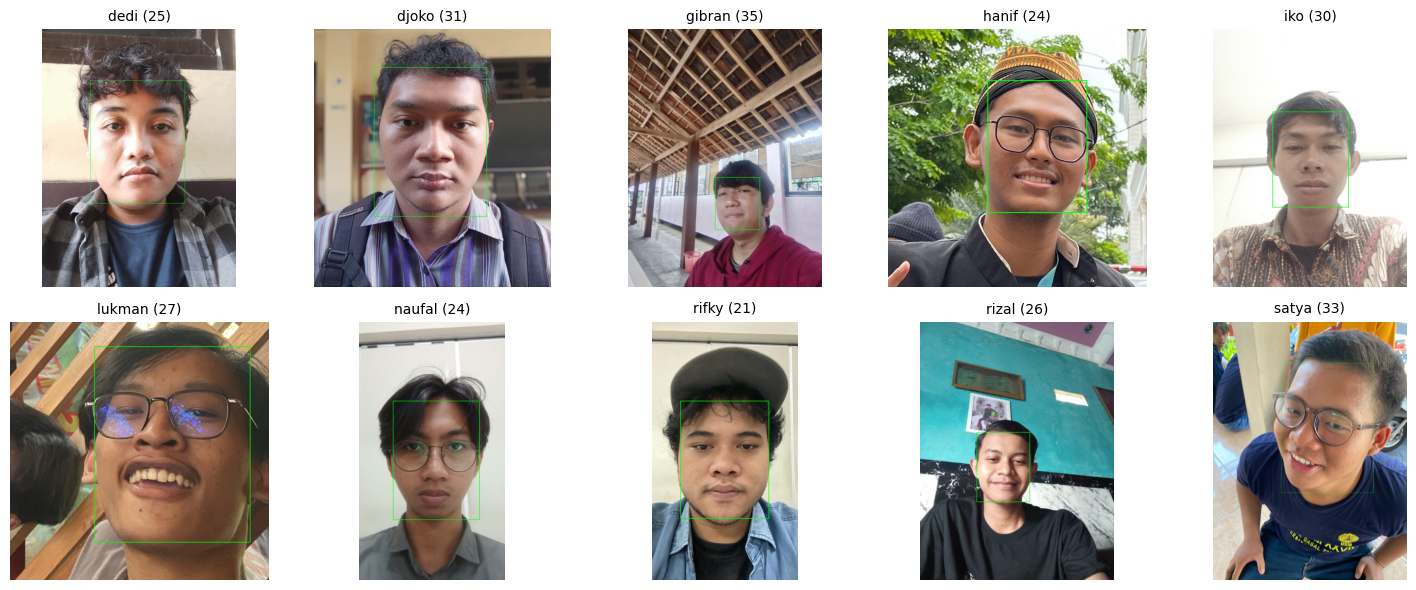

In [6]:
import cv2, os
import matplotlib.pyplot as plt
from mtcnn import MTCNN
from deepface import DeepFace

path = '/content/drive/MyDrive/Praktikum Pengolahan Citra/Data Wajah Pengolahan Citra/Data Wajah'

detector = MTCNN()
files = sorted([f for f in os.listdir(path) if f.lower().endswith(('.jpg','.jpeg','.png'))])[:10]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i, f in enumerate(files):
    fp = os.path.join(path, f)
    img = cv2.imread(fp)
    if img is None: continue
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img_rgb)
    for face in faces:
        x, y, w, h = face['box']
        cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (0,255,0), 2)
    try:
        age = DeepFace.analyze(img_path=fp, actions=['age'], enforce_detection=False)[0]['age']
    except: age = "?"
    axes[i].imshow(img_rgb)
    axes[i].axis('off')
    axes[i].set_title(f"{os.path.splitext(f)[0]} ({age})", fontsize=10)

plt.tight_layout()
plt.show()


**MTCNN + Insight Face Model**

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 14.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 129.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.0 MB/s eta 0:00:00
download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:03<00:00, 91741.49KB/s]


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


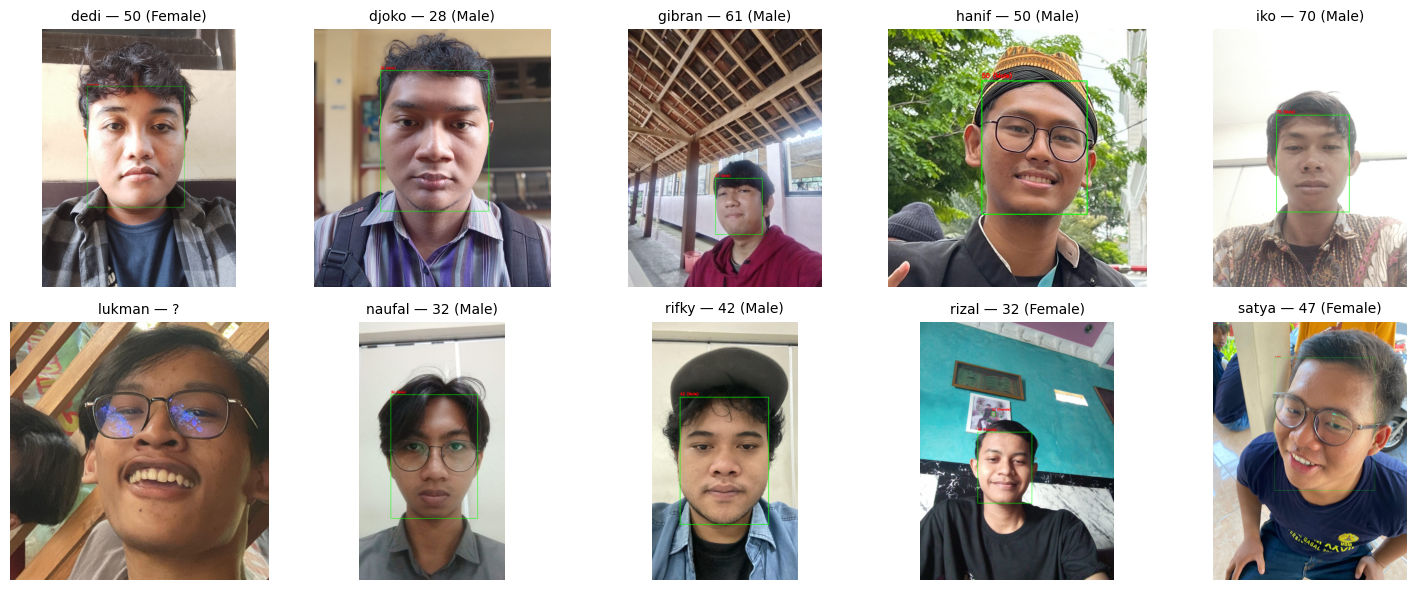

In [7]:
# ================================
# 1. INSTALL INSIGHTFACE
# ================================
!pip install insightface==0.7.3 onnxruntime onnx --quiet

# ================================
# 2. IMPORT LIBRARY
# ================================
import cv2, os
import matplotlib.pyplot as plt
from insightface.app import FaceAnalysis


# ================================
# 3. LOAD INSIGHTFACE MODEL
# ================================

# buffalo_l = model lengkap (face detection + attribute + recognition)
app = FaceAnalysis(name="buffalo_l")
app.prepare(ctx_id=0, det_size=(640, 640))   # ctx_id=0 = CPU/GPU otomatis


# ================================
# 4. SET PATH DATASET
# ================================
path = '/content/drive/MyDrive/Praktikum Pengolahan Citra/Data Wajah Pengolahan Citra/Data Wajah'

files = sorted([f for f in os.listdir(path) if f.lower().endswith(('.jpg','.jpeg','.png'))])[:10]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()


# ================================
# 5. LOOP GAMBAR
# ================================
for i, f in enumerate(files):
    fp = os.path.join(path, f)
    img = cv2.imread(fp)
    if img is None:
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Deteksi wajah & atribut (umur, gender)
    faces = app.get(img_rgb)

    age_text = "?"

    # Gambar wajah satu per satu
    for face in faces:
        x1, y1, x2, y2 = face.bbox.astype(int)

        # Gambar bounding box
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0,255,0), 2)

        # Ambil umur dan gender
        age = int(face.age)
        gender = "Male" if face.gender == 1 else "Female"

        age_text = f"{age} ({gender})"

        # Tulis label di atas bounding box
        cv2.putText(img_rgb, age_text, (x1, y1-10),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (255,0,0), 2)


    axes[i].imshow(img_rgb)
    axes[i].axis("off")
    axes[i].set_title(f"{os.path.splitext(f)[0]} — {age_text}", fontsize=10)

plt.tight_layout()
plt.show()


# **TUGAS PRAKTIKUM 6**
Ganti dataset ke fashion-mnist atau cifar-10, lalu bandingkan metrik

Dataset yang digunakan: Fashion-MNIST
Shape data training: (60000, 28, 28, 1)
Shape data testing: (10000, 28, 28, 1)
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7244 - loss: 0.7993 - val_accuracy: 0.8587 - val_loss: 0.4010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8712 - loss: 0.3595 - val_accuracy: 0.8755 - val_loss: 0.3527
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8905 - loss: 0.3072 - val_accuracy: 0.8862 - val_loss: 0.3187
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8973 - loss: 0.2807 - val_accuracy: 0.8950 - val_loss: 0.2938
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9078 - loss: 0.2520 - val_accuracy: 0.8979 - val_loss: 0.2783
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9148 - loss: 0.2293 - val_accuracy: 0.8906 - val_loss: 0.2952
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9217 - loss: 0.2155 - val_accuracy: 0.9044 - val

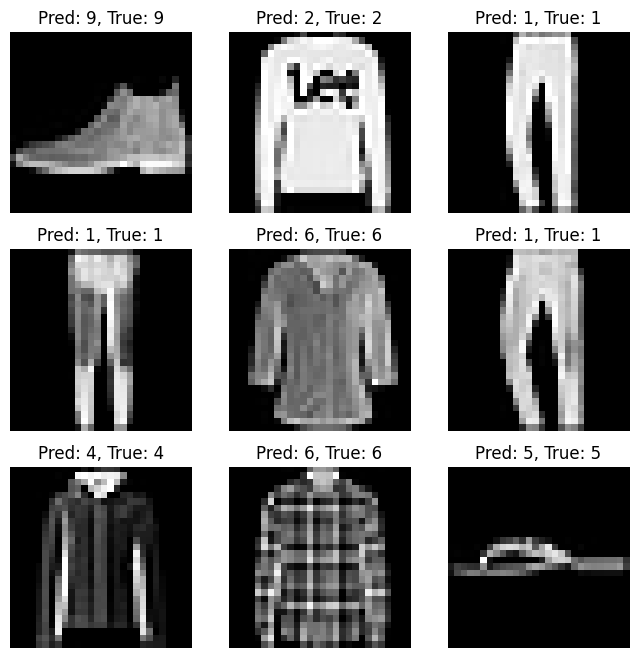

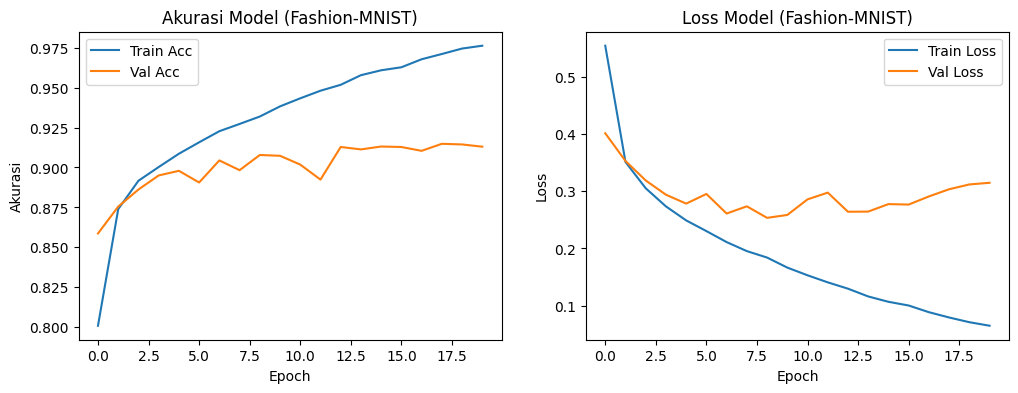

In [9]:
# === 1. Load & Preprocessing Data ===
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Pilih dataset: 'fashion_mnist' atau 'cifar10'
dataset_choice = 'fashion_mnist'  # ubah ke 'cifar10' untuk dataset lain

if dataset_choice == 'fashion_mnist':
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    x_train = x_train[..., None]  # tambahkan 1 channel (grayscale)
    x_test = x_test[..., None]
    input_shape = (28, 28, 1)
    num_classes = 10
    label_name = "Fashion-MNIST"

elif dataset_choice == 'cifar10':
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    input_shape = (32, 32, 3)
    num_classes = 10
    label_name = "CIFAR-10"
    y_train = y_train.flatten()
    y_test = y_test.flatten()

print(f"Dataset yang digunakan: {label_name}")
print("Shape data training:", x_train.shape)
print("Shape data testing:", x_test.shape)

# === 2. Membangun Model CNN ===
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# === 3. Kompilasi & Training ===
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1
)

# === 4. Evaluasi Model ===
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nAkurasi pada data uji ({label_name}): {test_acc:.4f}")

y_pred = np.argmax(model.predict(x_test), axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# === 5. Visualisasi Hasil ===
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    if dataset_choice == 'cifar10':
        plt.imshow(x_test[i])
    else:
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}, True: {y_test[i]}")
    plt.axis('off')
plt.show()

# === 6. (Opsional) Plot Akurasi dan Loss ===
plt.figure(figsize=(12, 4))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title(f'Akurasi Model ({label_name})')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(f'Loss Model ({label_name})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
